In [1]:
from gold_room_env import MiniHackGoldRoom
from utils import show_episode
from planning import a_star, apply, g, h, allowed_moves, allowed_supermoves, random_search
import gym

In [11]:
width = 5
height = 5
n_golds = 4
n_leps = 0
max_steps = 100

env = gym.make(
    'MiniHack-MyTask-Custom-v0',
    width=width, height=height,
    n_leps=n_leps,
    n_golds=n_golds,
    max_episode_steps=max_steps,
    gold_score=100,
    stair_score=1,
    time_penalty=-1
    )

plan1, n_expanded1 = a_star(
    env=env,
    allowed_moves_fun=allowed_moves,
    g_function=g,
    h_function=h
    )
print('PLAN 1')
print(f'Starting position: {env.agent_coord}, Stair position: {env.stair_coord}')
print(f'Gold positions: {env.gold_coords}')
print(f'Expanded nodes: {n_expanded1}')
plan1.show()

env_copy = env.copy()

print('\nPLAN 2')
plan2, n_expanded2 = a_star(
    env=env_copy,
    allowed_moves_fun=allowed_supermoves,
    g_function=g,
    h_function=h
    )
print(f'Starting position: {env_copy.agent_coord}, Stair position: {env_copy.stair_coord}')
print(f'Gold positions: {env_copy.gold_coords}')
print(f'Expanded nodes: {n_expanded2}')
plan2.show()

PLAN 1
Starting position: (3, 2), Stair position: (3, 0)
Gold positions: [(2, 3), (3, 1), (3, 3), (1, 3)]
Expanded nodes: 71
Path: [(3, 2), (3, 3), (2, 3), (1, 3), (2, 2), (3, 1), (3, 0)]
Actions: ['N', 'W', 'W', 'SE', 'SE', 'S']

PLAN 2
Starting position: (3, 2), Stair position: (3, 0)
Gold positions: [(2, 3), (3, 1), (3, 3), (1, 3)]
Expanded nodes: 121
Path: [(3, 2), (3, 3), (2, 3), (1, 3), (2, 2), (3, 1), (3, 0)]
Actions: ['N', 'W', 'W', 'SE', 'SE', 'S']


In [12]:
states1, rewards1, done1 = apply(env, plan1)
states2, rewards2, done2 = apply(env_copy, plan2)

print(rewards1)
print(rewards2)

[0, 99.0, 99.0, 99.0, -1.0, 99.0, 0.0]
[0, 99.0, 99.0, 99.0, -1.0, 99.0, 0.0]


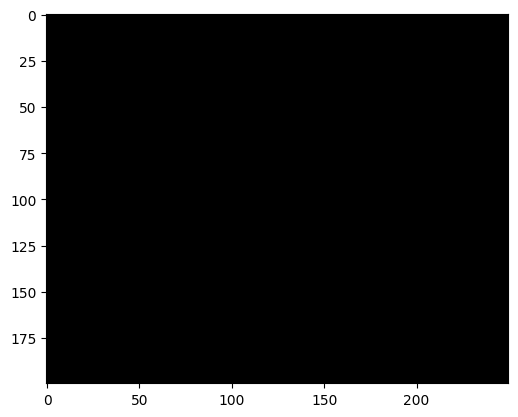

In [13]:
show_episode(states1, clear_output=True)

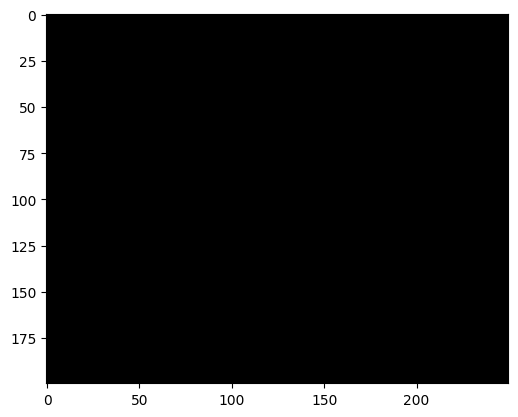

In [15]:
show_episode(states2, clear_output=True)

In [13]:
from gold_room_env import MiniHackGoldRoom
from utils import show_episode
from planning import a_star, apply, g, h, allowed_moves, allowed_supermoves, random_search
import gym

width = 2
height = 2
n_golds = 4
n_leps = 0
max_steps = 100

env = gym.make(
    'MiniHack-MyTask-Custom-v0',
    width=width, height=height,
    n_leps=n_leps,
    n_golds=n_golds,
    max_episode_steps=max_steps,
    gold_score=100,
    stair_score=1,
    time_penalty=-1
    )

states, rewards, stair_reached = random_search(env=env, allowed_moves_fun=allowed_moves)

my coords: (1, 1)
its coords: (0, 1)
['W', 'S', 'SW']
['E', 'S', 'SE']


In [23]:
states[0]['agent_coord']

(1, 0)

In [21]:
[state['time'] for state in states]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

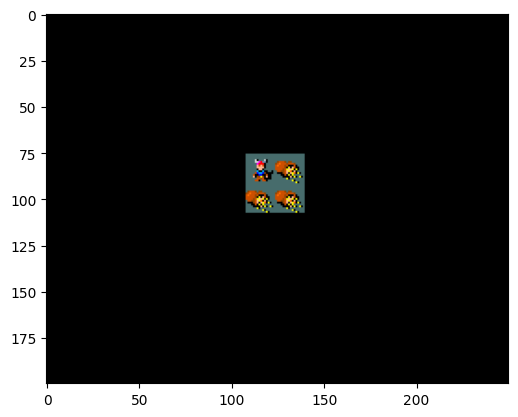

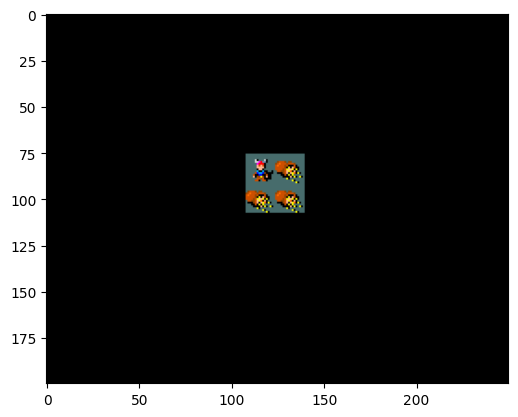

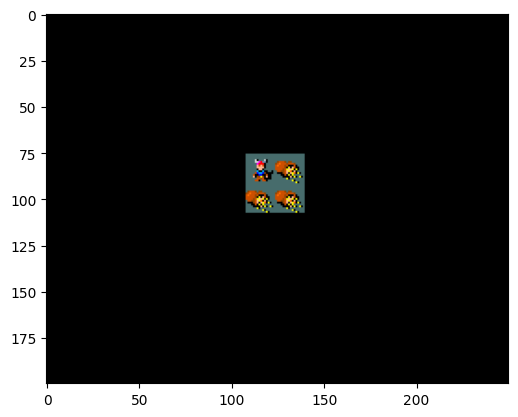

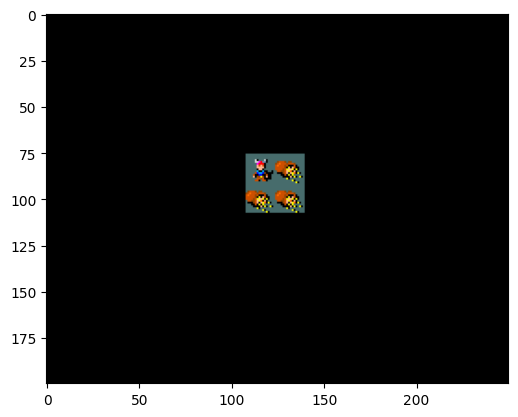

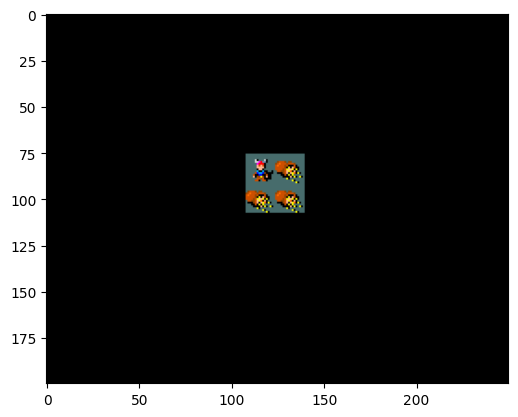

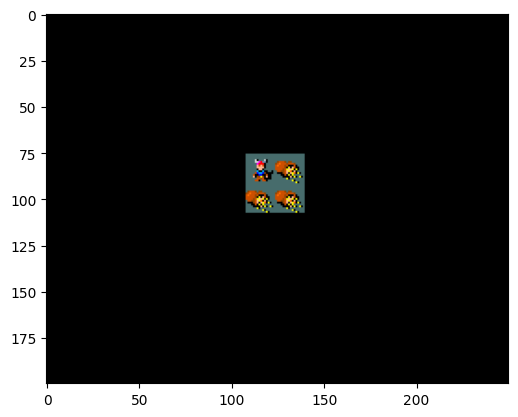

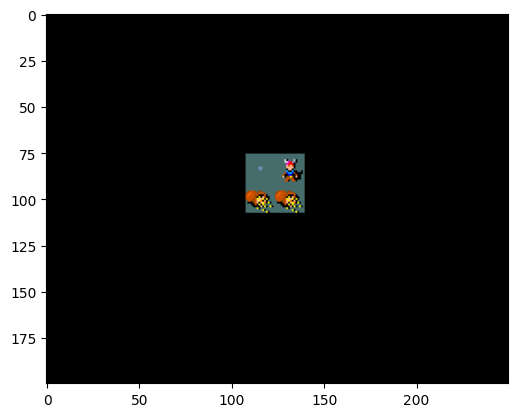

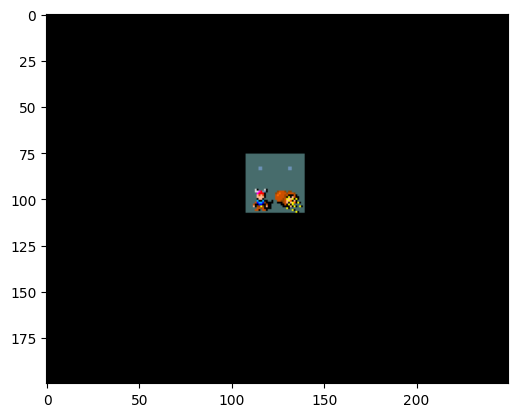

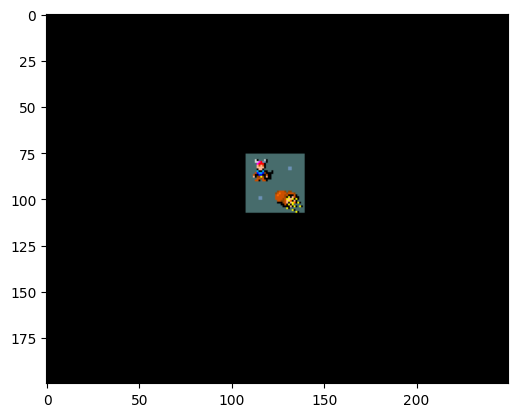

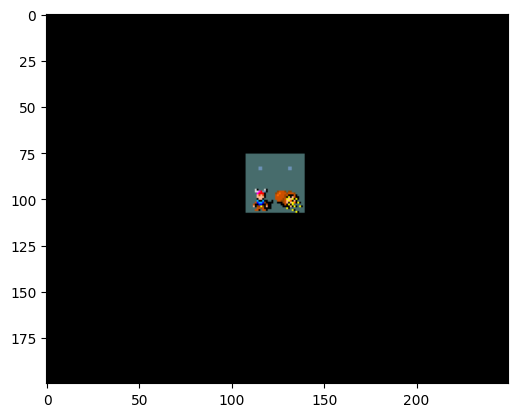

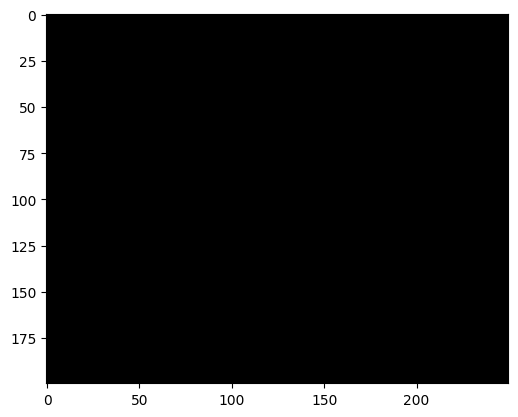

In [22]:
show_episode(states, clear_output=False)